![picture](https://raw.githubusercontent.com/Ferstuque/ML_Optimization/main/logo-alura.svg)---
# This project was created using [Alura](https://https://www.alura.com.br/)'s Machine Learning course



# Machine Learning - Optimization Through Hyperparameters Models



### In machine learning models, the primary concern often revolves around achieving accurate predictions. However, before running a model, it's essential to make preliminary data adjustments, particularly by optimizing hyperparameters. Moreover, it's crucial to strive for efficiency to minimize processing costs, ultimately enhancing model responsiveness.
### This project is designed to demonstrate the significance of leveraging hyperparameters to improve the performance and reliability of predictive outcomes in solving machine learning challenges.
---

In [39]:
!pip install graphviz
!pip install pydot

!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [40]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

# Columns rename
dados = dados.rename(columns={'preco' : 'price', 'vendido' : 'sold', 'idade_do_modelo' : 'model_year', 'km_por_ano' : 'km_by_year'})

dados.head()

,price,sold,model_year,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


#### Simulating a "bad luck" called 'azar' situation where classes are ordered by default

---



In [41]:
dados_azar = dados.sort_values('sold', ascending=True)
x_azar = dados_azar[['price', 'model_year', 'km_by_year']]
y_azar = dados_azar['sold']
dados_azar.head()

,price,sold,model_year,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


#### Running our bad model using Dummy Classifier

In [42]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

model = DummyClassifier()
results = cross_validate(
    model,
    x_azar,
    y_azar,
    cv=10,
    return_train_score=False
    )
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print('Acurracy com Dummy Stratified, 10 = [%.2f, %.2f]' % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Acurracy com Dummy Stratified, 10 = [58.00, 58.00]


#### Now using the Decision Tree Classifier (DTC)

In [43]:
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(
    model,
    x_azar,
    y_azar,
    cv=10,
    return_train_score=False
    )
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print('Acurracy com Dummy Stratified, 10 = [%.2f, %.2f]' % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Acurracy com Dummy Stratified, 10 = [73.83, 77.73]


#### Creating a group to claasify the Car Models based on ages

In [44]:
np.random.seed(SEED)
dados['model'] = dados.model_year + np.random.randint(-2, 3, size=len(dados))
dados.model = dados.model + abs(dados.model.min()) + 1
dados.head()

,price,sold,model_year,km_by_year,model
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


#### Defining measures to retun our results

In [45]:
def print_results(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print(f'Average Accuracy: {(media * 100):.2f}')
  print(f'Range Accuracy = [{((media - 2 * desvio_padrao) * 100):.2f}, {((media + 2 * desvio_padrao) * 100):.2f}]')

#### Grouping by Model using GroupKFold to analyse the data behavior

In [46]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(
    model,
    x_azar,
    y_azar,
    cv = cv,
    groups = dados.model,
    return_train_score=False
    )
print_results(results)

Average Accuracy: 75.78
Range Accuracy = [73.67, 77.90]


#### Pipelines in GroupKFold with StandardScaler and SVC

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
model = SVC()

# We give names as Transformation to the Standard Scaler and Estimator to SVC
pipeline = Pipeline([('transformation', scaler), ('estimator', model)])

cv = GroupKFold(n_splits=10)
results = cross_validate(
    pipeline,
    x_azar,
    y_azar,
    cv=cv,
    groups = dados.model,
    return_train_score=False
    )
print_results(results)

Average Accuracy: 76.68
Range Accuracy = [74.28, 79.08]


#### Considering the Decision Tree Classifier Model

In [48]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(
    model,
    x_azar,
    y_azar,
    cv = cv,
    groups = dados.model,
    return_train_score=False
    )
print_results(results)

Average Accuracy: 75.78
Range Accuracy = [73.67, 77.90]


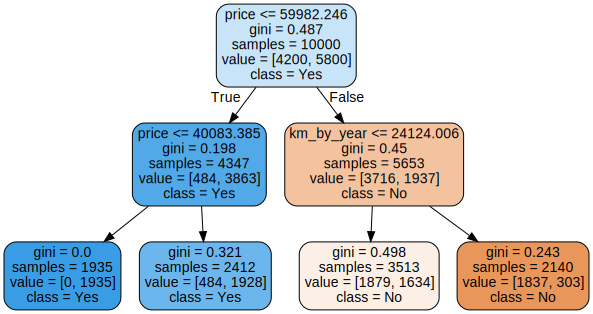

In [49]:
from sklearn.tree import export_graphviz
import graphviz

model.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(
    model,
    out_file = None,
    filled = True,
    rounded = True,
    class_names = ['No', 'Yes'],
    feature_names = features
)
graph = graphviz.Source(dot_data)
graph

#### Enhancing the number of dephts for the Tree

In [50]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth=3)
results = cross_validate(
    model,
    x_azar,
    y_azar,
    cv = cv,
    groups = dados.model,
    return_train_score=False
    )
print_results(results)

Average Accuracy: 78.67
Range Accuracy = [76.40, 80.94]


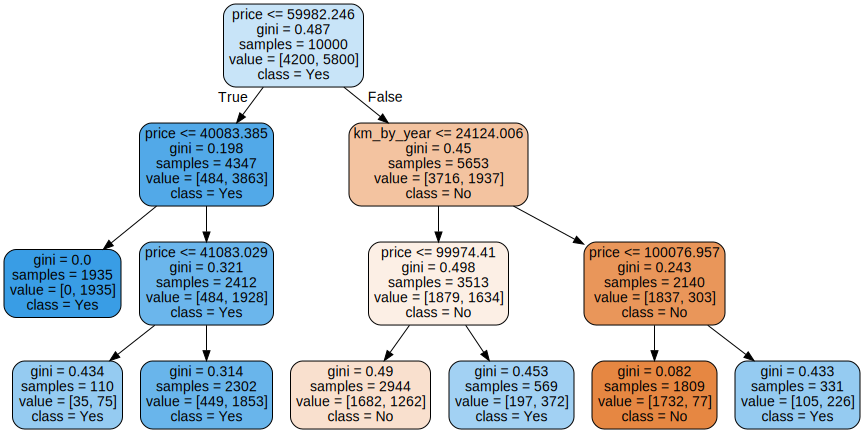

In [51]:
from sklearn.tree import export_graphviz
import graphviz

model.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(
    model,
    out_file = None,
    filled = True,
    rounded = True,
    class_names = ['No', 'Yes'],
    feature_names = features
)
graph = graphviz.Source(dot_data)
graph

#### Choosing the number of depths can impact in our results, however increasing too much the number of depths may also bring a not expected result

In [52]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
model = DecisionTreeClassifier(max_depth=10)
results = cross_validate(
    model,
    x_azar,
    y_azar,
    cv = cv,
    groups = dados.model,
    return_train_score=False
    )
print_results(results)

Average Accuracy: 77.19
Range Accuracy = [75.26, 79.13]


#### The question is: which is better, more ou less depths?

In [53]:
# We can run the model with a range of depths to analyse wich is better
def range_of_dtc(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(
      model,
      x_azar,
      y_azar,
      cv = cv,
      groups = dados.model,
      return_train_score=False
      )
  avg = (results['test_score'].mean() * 100)
  print(f' Tree with max_depths = {max_depth}, the test average is: {(avg):.2f}')

for i in range(1,33):
  range_of_dtc(i)

 Tree with max_depths = 1, the test average is: 75.78
 Tree with max_depths = 2, the test average is: 75.78
 Tree with max_depths = 3, the test average is: 78.67
 Tree with max_depths = 4, the test average is: 78.63
 Tree with max_depths = 5, the test average is: 78.56
 Tree with max_depths = 6, the test average is: 78.12
 Tree with max_depths = 7, the test average is: 77.96
 Tree with max_depths = 8, the test average is: 77.86
 Tree with max_depths = 9, the test average is: 77.38
 Tree with max_depths = 10, the test average is: 77.19
 Tree with max_depths = 11, the test average is: 76.97
 Tree with max_depths = 12, the test average is: 76.49
 Tree with max_depths = 13, the test average is: 75.81
 Tree with max_depths = 14, the test average is: 75.66
 Tree with max_depths = 15, the test average is: 75.16
 Tree with max_depths = 16, the test average is: 75.11
 Tree with max_depths = 17, the test average is: 74.74
 Tree with max_depths = 18, the test average is: 74.33
 Tree with max_dept

#### We can notice that the model decrease the result values, because it was overfitted

In [54]:
def range_of_dtc(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(
      model,
      x_azar,
      y_azar,
      cv = cv,
      groups = dados.model,
      return_train_score=True
      )
  avg_test = (results['test_score'].mean() * 100)
  avg_train = (results['train_score'].mean() * 100)
  print(f' Tree with max_depths = {max_depth}, the test average is: {(avg_test):.2f}, and train: {(avg_train):.2f}')

for i in range(1,33):
  range_of_dtc(i)

 Tree with max_depths = 1, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 2, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 3, the test average is: 78.67, and train: 78.75
 Tree with max_depths = 4, the test average is: 78.63, and train: 78.79
 Tree with max_depths = 5, the test average is: 78.56, and train: 78.94
 Tree with max_depths = 6, the test average is: 78.12, and train: 79.17
 Tree with max_depths = 7, the test average is: 77.96, and train: 79.50
 Tree with max_depths = 8, the test average is: 77.86, and train: 79.89
 Tree with max_depths = 9, the test average is: 77.38, and train: 80.46
 Tree with max_depths = 10, the test average is: 77.19, and train: 81.16
 Tree with max_depths = 11, the test average is: 76.97, and train: 82.03
 Tree with max_depths = 12, the test average is: 76.49, and train: 82.89
 Tree with max_depths = 13, the test average is: 75.81, and train: 83.95
 Tree with max_depths = 14, the test average is: 75.66, and 

#### Creating a table to show results

In [55]:
def range_of_dtc(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(
      model,
      x_azar,
      y_azar,
      cv = cv,
      groups = dados.model,
      return_train_score=True
      )
  avg_test = (results['test_score'].mean() * 100)
  avg_train = (results['train_score'].mean() * 100)
  # print(f' Tree with max_depths = {max_depth}, the test average is: {(avg_test):.2f}, and train: {(avg_train):.2f}')
  table = [max_depth, avg_train, avg_test]
  return table
results_table = [range_of_dtc(i) for i in range(1,33)]
results_table = pd.DataFrame(results_table, columns = ['max_depth', 'train', 'test'])

In [56]:
results_table.head()

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


#### Plotting a graph of our data frame

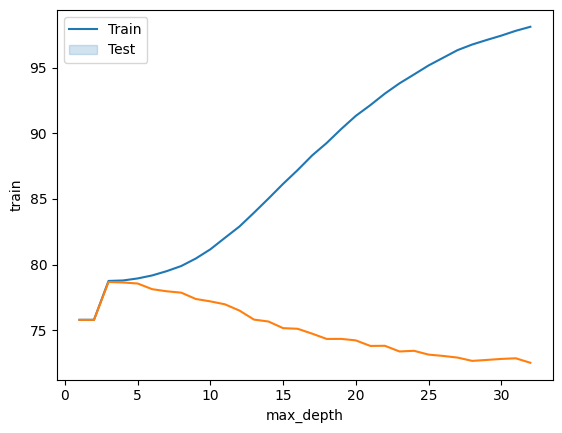

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = 'max_depth', y = 'train', data = results_table)
sns.lineplot(x = 'max_depth', y = 'test', data = results_table)
plt.legend(['Train', 'Test']);

#### Checking the best values for test.

In [58]:
results_table.sort_values('test', ascending = False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


#### Exploring hyperparameters in two dimensions

In [59]:
def range_of_dtc(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(
      model,
      x_azar,
      y_azar,
      cv = cv,
      groups = dados.model,
      return_train_score=True
      )
  avg_test = (results['test_score'].mean() * 100)
  avg_train = (results['train_score'].mean() * 100)
  print(f' Tree with max_depths = {max_depth}, Min Samples Leaf = {min_samples_leaf}, the test average is: {(avg_test):.2f}, and train: {(avg_train):.2f}')
  table = [max_depth, min_samples_leaf, avg_train, avg_test]
  return table

def search_values():
  results_table = []
  for max_depth in range(1,33):
    for min_samples_leaf in range(1,33):
      table = range_of_dtc(max_depth, min_samples_leaf)
      results_table.append(table)
  results_table = pd.DataFrame(results_table, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
  return results_table

results_table = search_values()

 Tree with max_depths = 1, Min Samples Leaf = 1, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 2, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 3, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 4, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 5, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 6, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 7, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 8, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 9, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 10, the test average is: 75.78, and train: 75.79
 Tree with max_depths = 1, Min Samples Leaf = 11, the test 

#### Showing the best first 5 results

In [60]:
results_table.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
123,4,28,78.750993,78.672633
126,4,31,78.750993,78.672633
85,3,22,78.750993,78.672633
84,3,21,78.750993,78.672633
83,3,20,78.750993,78.672633


#### Checking the correlation between the two hyperparameters

In [61]:
corr = results_table.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,-3.757177e-16,0.681408,-0.522835
min_samples_leaf,-3.757177e-16,1.000000e+00,-0.453825,0.528330
train,6.814075e-01,-4.538248e-01,1.000000,-0.762534
test,-5.228349e-01,5.283299e-01,-0.762534,1.000000


<Axes: >

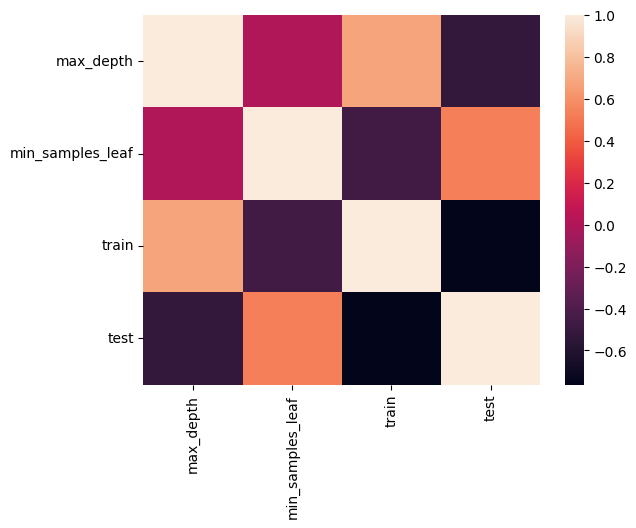

In [62]:
sns.heatmap(corr)

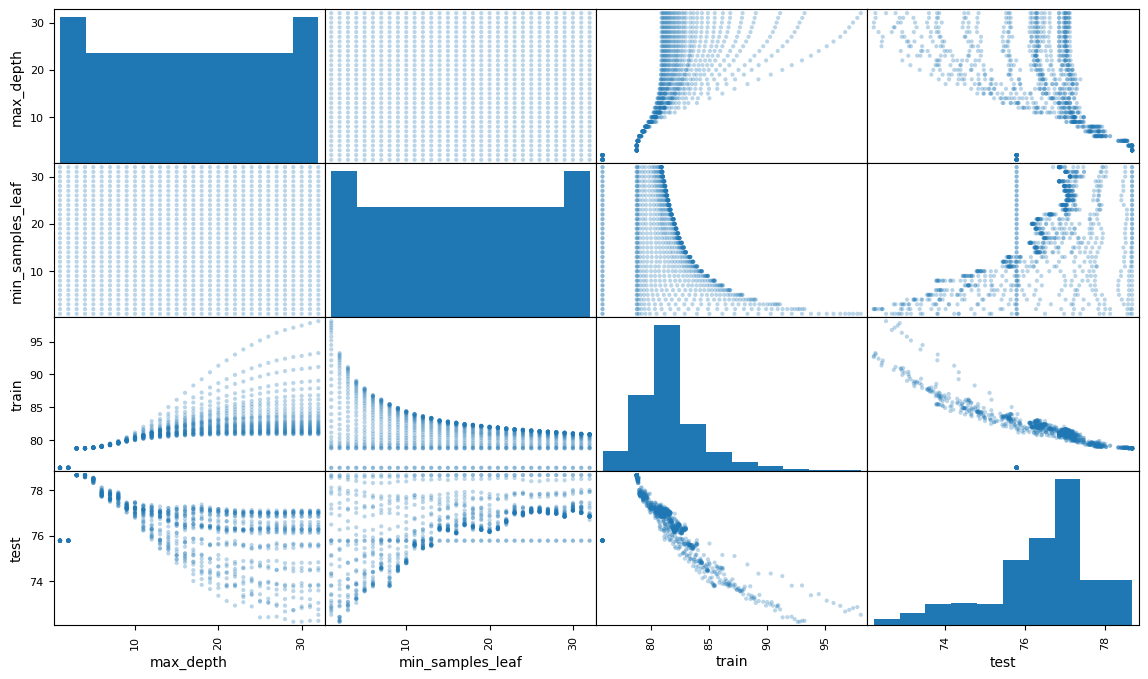

In [63]:
pd.plotting.scatter_matrix(results_table, figsize=(14,8), alpha=0.3);

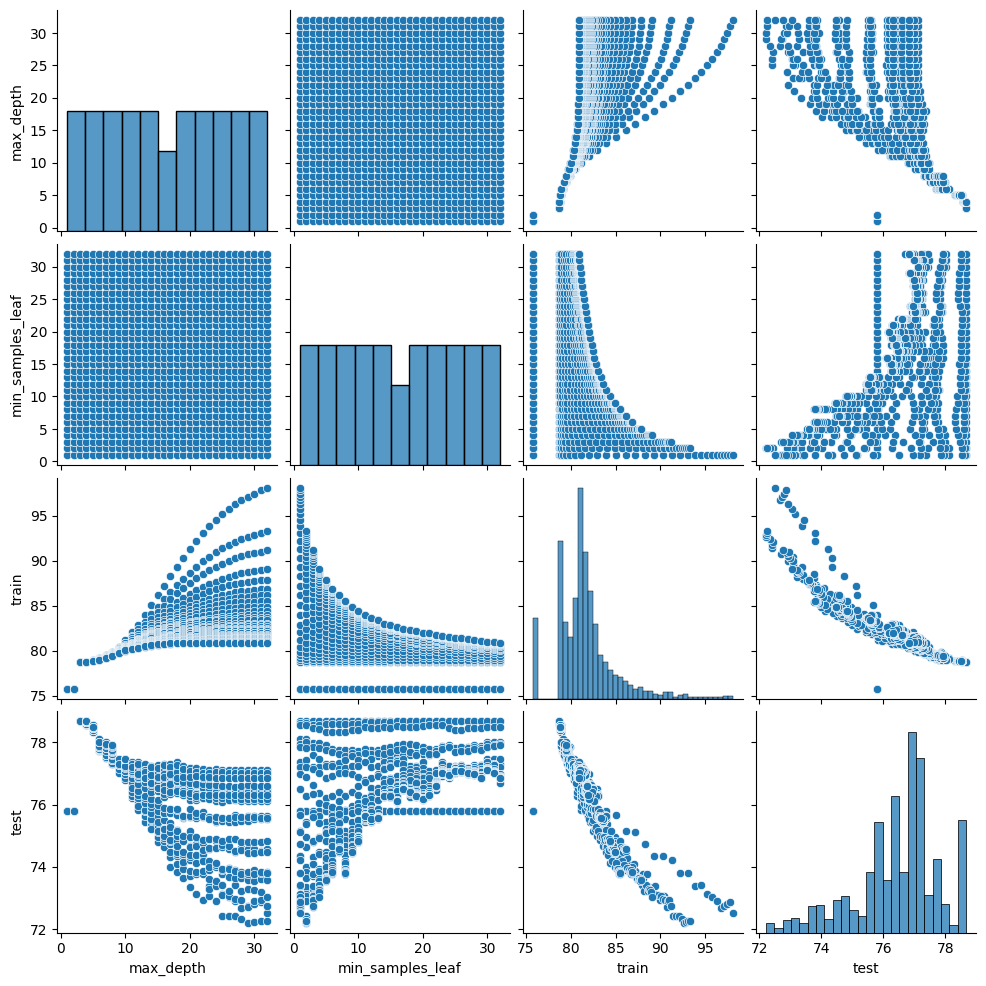

In [64]:
sns.pairplot(results_table)

#### There is no magic rule to define which is better for the hyperparameters values

#### Exploring hyperparameters in three dimensions

In [65]:
def range_of_dtc(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(
      model,
      x_azar,
      y_azar,
      cv = cv,
      groups = dados.model,
      return_train_score=True
      )
  fit_time = results['fit_time'].mean() # training time
  score_time = results['score_time'].mean() # testing time
  avg_test = (results['test_score'].mean() * 100)
  avg_train = (results['train_score'].mean() * 100)
  # print(f' Tree with max_depths = {max_depth}, Min Samples Leaf = {min_samples_leaf}, Min Samples Split = {min_samples_split}, the test average is: {(avg_test):.2f}, and train: {(avg_train):.2f}')
  table = [max_depth, min_samples_leaf, min_samples_split, avg_train, avg_test, fit_time, score_time]
  return table

def search_values():
  results_table = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]: # picking random values to reduce the processing time
      for min_samples_split in [32, 64, 128, 256]:
        table = range_of_dtc(max_depth, min_samples_leaf, min_samples_split)
        results_table.append(table)
  results_table = pd.DataFrame(results_table, columns = ['max_depth', 'min_samples_leaf', 'min_samples_split', 'train', 'test', 'fit_time', 'score_time'])
  return results_table

results_table = search_values()

In [66]:
results_table.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.010786,0.001962
48,4,32,32,78.750993,78.672633,0.011036,0.001527
34,3,32,128,78.750993,78.672633,0.009388,0.001491
35,3,32,256,78.750993,78.672633,0.008977,0.001707
36,3,64,32,78.750993,78.672633,0.008904,0.001598


In [67]:
corr = results_table.corr()

#### Using the correlation graph from Seaborn library

<Axes: >

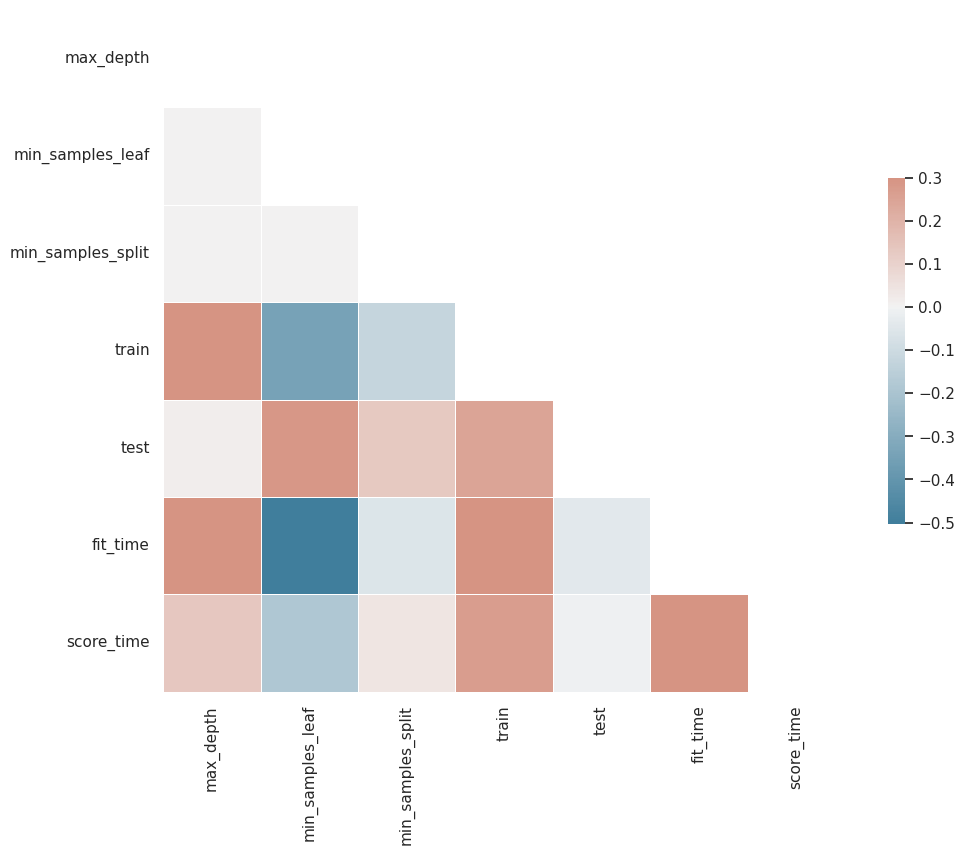

In [68]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Exploring hyperparameters space using the Grid Search CV

In [69]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

search = GridSearchCV(DecisionTreeClassifier(),
                      hyperparameters_space,
                      cv = GroupKFold(n_splits = 10)
                      )
search.fit(x_azar, y_azar, groups = dados.model)
results_table = pd.DataFrame(search.cv_results_)
results_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009180,0.001010,0.001428,0.000127,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.009167,0.000479,0.001707,0.000301,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.009607,0.001373,0.001910,0.000458,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.008739,0.000106,0.001489,0.000124,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.008617,0.000111,0.001370,0.000090,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [70]:
print(search.best_params_)
print(f'{(search.best_score_ * 100):.2f}')

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67


In [71]:
best = search.best_estimator_
best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [72]:
from sklearn.metrics import accuracy_score

predictions = best.predict(x_azar)
accuracy = accuracy_score(predictions, y_azar) * 100
print('The accuracy for the data was %.2f%%' % accuracy)

The accuracy for the data was 78.75%


#### Following the SKLearn Cross validation documentation, models that use hyperparameters with a GridSearchCV and Cross Validation Score together, should not be used for predictions, it may create a vicious data and be very optimistic due to a nested cross validation. [LINK](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#:~:text=Choosing%20the%20parameters%20that%20maximize,model%20and%20overfit%20the%20data.)

#### How to avoid this approach for vicious data?
#### It's necessary to create another Cross Validation, but for the all Search

In [73]:
# However the nested GroupKFold doen't work on Pandas
from sklearn.model_selection import cross_val_score

try:
  scores = cross_val_score(search, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.model)
except:
  print("The 'groups' parameter should not be None. - Pandas error")

The 'groups' parameter should not be None. - Pandas error


#### In this case, we will build our code with a simple KFold with 10 splits

In [74]:
from sklearn.model_selection import GridSearchCV, KFold

SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

search = GridSearchCV(DecisionTreeClassifier(),
                      hyperparameters_space,
                      cv = KFold(n_splits = 5, shuffle=True)
                      )
search.fit(x_azar, y_azar)
results_table = pd.DataFrame(search.cv_results_)
results_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008701,0.000974,0.001628,0.000359,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.007859,0.000066,0.001405,0.000085,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.008255,0.000534,0.001577,0.000243,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.007878,0.000103,0.001505,0.000188,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.008199,0.000082,0.001910,0.000137,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [75]:
scores = cross_val_score(search, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [76]:
def print_score(scores):
  media = scores.mean()
  desvio_padrao = scores.std()
  print(f'Average Accuracy: {(media * 100):.2f}')
  print(f'Range Accuracy = [{((media - 2 * desvio_padrao) * 100):.2f}, {((media + 2 * desvio_padrao) * 100):.2f}]')

In [77]:
print_score(scores)

Average Accuracy: 78.67
Range Accuracy = [76.80, 80.54]


In [78]:
best = search.best_estimator_
print(best)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


#### Thus we can print our Tree using the Best Estimator

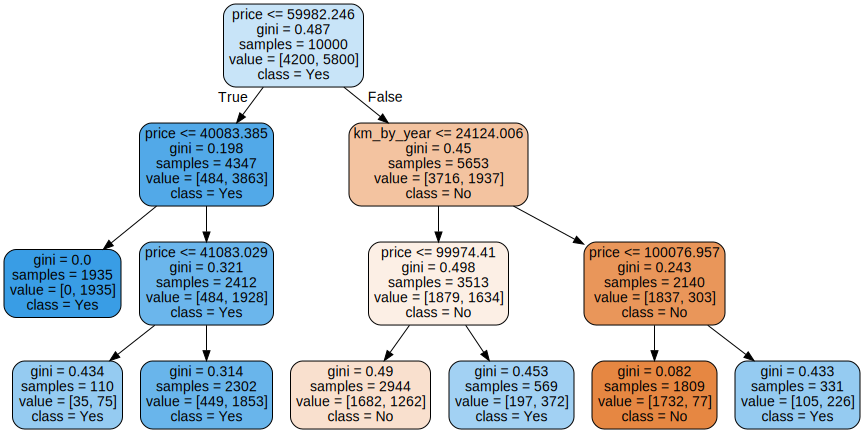

In [79]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(
    best,
    out_file = None,
    filled = True,
    rounded = True,
    class_names = ['No', 'Yes'],
    feature_names = features
)
graph = graphviz.Source(dot_data)
graph

#### Randomized Search

#### Chossing values randomly from our data

In [80]:
from sklearn.model_selection import RandomizedSearchCV, KFold

SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

search = RandomizedSearchCV(DecisionTreeClassifier(),
                      hyperparameters_space,
                      n_iter = 16, # number of iterations
                      cv = KFold(n_splits = 5, shuffle=True),
                      random_state = SEED
                      )
search.fit(x_azar, y_azar)
results_table = pd.DataFrame(search.cv_results_)
results_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010969,0.000826,0.001988,0.000843,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.784,0.769,0.7985,0.793,0.7730,0.7835,0.011278,13
1,0.007880,0.000086,0.001376,0.000044,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
2,0.008283,0.000590,0.001534,0.000234,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
3,0.012945,0.000419,0.001448,0.000055,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7
4,0.013860,0.002225,0.001541,0.000100,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7


In [81]:
scores = cross_val_score(search, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

Average Accuracy: 78.71
Range Accuracy = [77.49, 79.93]


In [82]:
best = search.best_estimator_
print(best)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


In [83]:
# Using just a sample from our data, we had a result very close to that above using the exhausting Grid Search CV
# We can use only a part of our data to explore the best results using the Randomized Search CV

#### Customizing the space of hyperparameters

In [84]:
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'max_depth' : [3, 5, 10, 15, 20, 30, None],
    'min_samples_split' : randint(32, 128),
    'min_samples_leaf' : randint(32, 128),
    'criterion' : ['gini', 'entropy']
}

search = RandomizedSearchCV(DecisionTreeClassifier(),
                      hyperparameters_space,
                      n_iter = 16, # number of iterations
                      cv = KFold(n_splits = 5, shuffle=True),
                      random_state = SEED
                      )
search.fit(x_azar, y_azar)
results_table = pd.DataFrame(search.cv_results_)
results_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011200,0.001650,0.001891,0.000234,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.014872,0.000461,0.002004,0.000137,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,14
2,0.013471,0.000403,0.001822,0.000085,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,8
3,0.017759,0.000757,0.002149,0.000251,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,16
4,0.013636,0.000420,0.001785,0.000181,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,7


In [85]:
scores = cross_val_score(search, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)
best = search.best_estimator_
print(best)

Average Accuracy: 78.71
Range Accuracy = [77.49, 79.93]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [86]:
# We can notice the model efficiency above, almost the same result without using the whole data, with less processing cost.

In [87]:
results_sorted_by_mean = results_table.sort_values('mean_test_score', ascending=False)
for index, row in results_sorted_by_mean.iterrows():
  print('%.3f +-(%.3f) %s' % (row.mean_test_score, row.std_test_score*2, row.params))

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +-(0.024) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.781 +-(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +-(0.019) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +-(0.012) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +-(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +-(0.020) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +-(0.009) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.779 +-(0.014) {'criterion': 'entropy', 'max_depth

#### Exploring more deeply, now with 64 iterations

In [88]:
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'max_depth' : [3, 5, 10, 15, 20, 30, None],
    'min_samples_split' : randint(32, 128),
    'min_samples_leaf' : randint(32, 128),
    'criterion' : ['gini', 'entropy']
}

search = RandomizedSearchCV(DecisionTreeClassifier(),
                      hyperparameters_space,
                      n_iter = 64, # number of iterations
                      cv = KFold(n_splits = 5, shuffle=True),
                      random_state = SEED
                      )
search.fit(x_azar, y_azar)
results_table = pd.DataFrame(search.cv_results_)
results_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009575,0.000991,0.001526,0.000157,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.014635,0.000196,0.001998,0.000157,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,46
2,0.013827,0.000381,0.002014,0.000037,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,27
3,0.017654,0.000926,0.002140,0.000129,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,64
4,0.014139,0.001220,0.001981,0.000051,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,26


In [89]:
results_sorted_by_mean = results_table.sort_values('mean_test_score', ascending=False)
for index, row in results_sorted_by_mean.iterrows():
  print('%.3f +-(%.3f) %s' % (row.mean_test_score, row.std_test_score*2, row.params))

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +-(0.019) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, '

In [90]:
scores = cross_val_score(search, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)
best = search.best_estimator_
print(best)

Average Accuracy: 78.66
Range Accuracy = [76.79, 80.53]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


#### Comparison between GridSearchCV and RandomizedSerach

#### Using decision tree classifer on various sub-samples of the dataset (Random Forest Classifier)

In [91]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'n_estimators' : [10, 100],
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'bootstrap' : [True, False], # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    'criterion' : ['gini', 'entropy']
}

tic = time.time()
search = GridSearchCV(RandomForestClassifier(),
                      hyperparameters_space,
                      cv = KFold(n_splits = 5, shuffle=True)
                      )
search.fit(x_azar, y_azar)
tac = time.time()
process_time = tac - tic
print(f' Processing Time: {(process_time):.2f} seconds')

results_table = pd.DataFrame(search.cv_results_)
results_table.head()

 Processing Time: 164.05 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102718,0.020145,0.009984,0.003431,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,130
1,0.475384,0.164534,0.025143,0.008436,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,93
2,0.029967,0.000738,0.003495,0.000430,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,89
3,0.277787,0.005993,0.016660,0.000735,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,119
4,0.029311,0.001069,0.003261,0.000063,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,135


In [92]:
results_sorted_by_mean = results_table.sort_values('mean_test_score', ascending=False)
for index, row in results_sorted_by_mean[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (row.mean_test_score, row.std_test_score*2, row.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


#### ***Attention:*** Run this command only using a RDD resource with a cluster.

#### It may take a long time to complete

In [93]:
# tic = time.time()
# scores = cross_val_score(search, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
# tac = time.time()
# process_time = tac - tic
# print(f' Processing Time: {(process_time):.2f} seconds')

# print_score(scores)
# best = search.best_estimator_
# print(best)

In [94]:
SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'n_estimators' : [10, 100],
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'bootstrap' : [True, False], # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    'criterion' : ['gini', 'entropy']
}

tic = time.time()
search = RandomizedSearchCV(RandomForestClassifier(),
                      hyperparameters_space,
                      n_iter = 20,
                      cv = KFold(n_splits = 5, shuffle=True)
                      )
search.fit(x_azar, y_azar)
tac = time.time()
process_time = tac - tic
print(f' Processing Time: {(process_time):.2f} seconds')

results_table = pd.DataFrame(search.cv_results_)
results_table.head()

 Processing Time: 24.45 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.391416,0.073190,0.019758,0.002424,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,10
1,0.040954,0.000826,0.003627,0.000130,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,13
2,0.414191,0.007049,0.019685,0.001272,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,6
3,0.031830,0.001143,0.003561,0.000081,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,20
4,0.041295,0.001742,0.003513,0.000210,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,18


In [95]:
results_sorted_by_mean = results_table.sort_values('mean_test_score', ascending=False)
for index, row in results_sorted_by_mean[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (row.mean_test_score, row.std_test_score*2, row.params))

0.776 +-(0.025) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.023) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.024) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.032) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.035) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [96]:
tic = time.time()
scores = cross_val_score(search, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
process_time = tac - tic
print(f' Processing Time: {(process_time):.2f} seconds')

print_score(scores)
best = search.best_estimator_
print(best)

 Processing Time: 109.12 seconds
Average Accuracy: 77.59
Range Accuracy = [76.47, 78.71]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=32)


#### Randomizing the hyperparameters spece combinations using the RandomizedSearchCV (Less Processing Cost)

In [97]:
SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'n_estimators' : randint(10, 101),
    'max_depth' : randint(3, 6),
    'min_samples_split' : randint(32, 129),
    'min_samples_leaf' : randint(32, 129),
    'bootstrap' : [True, False], # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    'criterion' : ['gini', 'entropy']
}

tic = time.time()
search = RandomizedSearchCV(RandomForestClassifier(),
                      hyperparameters_space,
                      n_iter = 80, # Considering 20 iterations took around 40 seconds, let's take 80 iterations.
                      cv = KFold(n_splits = 5, shuffle=True)
                      )
search.fit(x_azar, y_azar)
tac = time.time()
process_time = tac - tic
print(f' Processing Time: {(process_time):.2f} seconds')

results_table = pd.DataFrame(search.cv_results_)
results_table.head()

 Processing Time: 84.58 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.564935,0.157806,0.037111,0.015787,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7620,0.7750,0.7855,0.7580,0.7704,0.009744,75
1,0.224627,0.007797,0.013907,0.000463,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7575,0.7925,0.7855,0.7575,0.7729,0.014277,63
2,0.214396,0.004023,0.013618,0.000958,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7695,0.7925,0.7795,0.7575,0.7735,0.011781,59
3,0.139490,0.001668,0.009287,0.000280,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7670,0.7830,0.7865,0.7580,0.7733,0.010429,60
4,0.239374,0.035605,0.014416,0.001912,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7685,0.7930,0.7850,0.7585,0.7754,0.012220,30


In [98]:
results_sorted_by_mean = results_table.sort_values('mean_test_score', ascending=False)
for index, row in results_sorted_by_mean[:5].iterrows():
  print('%.3f +-(%.3f) %s' % (row.mean_test_score, row.std_test_score*2, row.params))

0.779 +-(0.025) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 84, 'min_samples_split': 89, 'n_estimators': 48}
0.778 +-(0.031) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 96, 'n_estimators': 18}
0.778 +-(0.032) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 121, 'min_samples_split': 47, 'n_estimators': 27}
0.778 +-(0.024) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 96, 'min_samples_split': 98, 'n_estimators': 11}
0.777 +-(0.029) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 63, 'min_samples_split': 88, 'n_estimators': 69}


In [99]:
tic = time.time()
scores = cross_val_score(search, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
process_time = tac - tic
print(f' Processing Time: {(process_time):.2f} seconds')

print_score(scores)
best = search.best_estimator_
print(best)

 Processing Time: 372.66 seconds
Average Accuracy: 77.24
Range Accuracy = [75.49, 78.99]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=84, min_samples_split=89,
                       n_estimators=48)


#### How to build a model using hyperparameters without Cross Validation

#### To do it so we must create another phase besides train and test, now it will have a validation step using the Stratfied Shuffle Split.

In [100]:
# 0.6 train      => train
# 0.2 test       => dev test
# 0.2 validation => test/validation

from sklearn.model_selection import train_test_split

SEED = 301
np.random.seed(SEED)

x_train_test, x_validation, y_train_test, y_validation = train_test_split(
    x_azar, y_azar, test_size = 0.2, shuffle=True, stratify=y_azar)

print('|........Elementes, Columns')
print(f'x_train_test {x_train_test.shape}')
print(f'x_validation {x_validation.shape}')
print(f'y_train_test {y_train_test.shape}')
print(f'y_validation {y_validation.shape}')

|........Elementes, Columns
x_train_test (8000, 3)
x_validation (2000, 3)
y_train_test (8000,)
y_validation (2000,)


In [101]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED = 301
np.random.seed(SEED)

hyperparameters_space = {
    'n_estimators' : randint(10, 101),
    'max_depth' : randint(3, 6),
    'min_samples_split' : randint(32, 129),
    'min_samples_leaf' : randint(32, 129),
    'bootstrap' : [True, False], # Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    'criterion' : ['gini', 'entropy']
}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25) # The 20% of the total 80% to test is actually 25% from train_test_split

tic = time.time()
search = RandomizedSearchCV(RandomForestClassifier(),
                      hyperparameters_space,
                      n_iter = 5, # Considering 20 iterations took around 40 seconds, let's use 80 iterations.
                      cv = split
                      )
search.fit(x_train_test, y_train_test)
tac = time.time()
process_time = tac - tic
print(f' Processing Time: {(process_time):.2f} seconds')

results_table = pd.DataFrame(search.cv_results_)
results_table.head()

 Processing Time: 1.19 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.257865,0.0,0.015517,0.0,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7745,0.7745,0.0,2
1,0.203610,0.0,0.013713,0.0,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7735,0.7735,0.0,5
2,0.184205,0.0,0.013449,0.0,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2
3,0.133680,0.0,0.009480,0.0,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7750,0.7750,0.0,1
4,0.188353,0.0,0.013158,0.0,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7745,0.0,2


In [102]:
# Now we can validate the model

tic = time.time()
scores = cross_val_score(search, x_validation, y_validation, cv = split)
tac = time.time()
process_time = tac - tic
print(f' Processing Time: {(process_time):.2f} seconds')
scores

 Processing Time: 0.42 seconds


array([0.754])

#### Thus we can run a model without a Cross Validation

#### There is also more to be explored to optmize a ML Model to estimate data, like skopt (scikit-optimize) or Hyperopt *libraries*
---